In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

# Las CNN no entrenan por problemas con el rescalado del Data Augmentation (ImageDataGenerator), hay diferencias entre los datasets de Tensorflow y los de Keras

Ver:
* https://github.com/keras-team/keras/issues/3894
* https://stackoverflow.com/questions/53986848/whats-the-difference-between-keras-datasets-mnist-and-tensorflow-examples-tutor
* https://datascience.stackexchange.com/questions/47759/keras-vs-tf-keras

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

from PIL import Image
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Dropout
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.examples.tutorials.mnist import input_data

from IPython.display import Image as IPImage

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [3]:
print(tf.__version__)
print(keras.__version__)

1.15.0
2.2.5


In [4]:
sns.set_style("white")

---

> Ejercicio 1

Cargamos los datos del MNIST

In [5]:
# importo y guardo MNIST data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
X_train = mnist.train.images
y_train = mnist.train.labels

X_val = mnist.validation.images
y_val = mnist.validation.labels

X_test = mnist.test.images
y_test = mnist.test.labels

In [7]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print()
print(f"X_val shape  : {X_val.shape}")
print(f"y_val shape  : {y_val.shape}")
print()
print(f"X_test shape : {X_test.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape: (55000, 784)
y_train shape: (55000, 10)

X_val shape  : (5000, 784)
y_val shape  : (5000, 10)

X_test shape : (10000, 784)
y_test shape : (10000, 10)


---

> Ejercicio2

Defina dos redes totalmente conectadas diferentes que sean capaces de clasificar la base MNIST.

Una con 3 capas ocultas y la otra con 5.

Evalúe posible overfitting en ambas y compárelas usándola parte de entrenamiento y la parte de la base destinada para validación.

Red Fully Connected - 3 Capas Ocultas

In [8]:
model_3hl = Sequential()
model_3hl.add(Dense(512, input_shape=(784,), activation="relu"))
model_3hl.add(Dense(1024, activation="relu"))
model_3hl.add(Dense(512, activation="relu"))
model_3hl.add(Dense(10, activation="softmax"))

model_3hl.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)

In [9]:
BATCH_SIZE = 128
NUM_EPOCHS = 20

history_3hl = model_3hl.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    validation_data=(X_val, y_val)
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 55000 samples, validate on 5000 samples
Epoch 1/20





55000/55000 [==============================] - 10s 181us/step - loss: 0.2139 - acc: 0.9352 - val_loss: 0.1273 - val_acc: 0.9608
Epoch 2/20
55000/55000 [==============================] - 9s 171us/step - loss: 0.0846 - acc: 0.9739 - val_loss: 0.0995 - val_acc: 0.9682
Epoch 3/20
55000/55000 [==============================] - 9s 171us/step - loss: 0.0548 - acc: 0.9818 - val_loss: 0.0785 - val_acc: 0.9786
Epoch 4/20
55000/55000 [==============================] - 9s 168us/step - loss: 0.0414 - acc: 0.9865 - val_loss: 0.0810 - val_acc: 0.9772
Epoch 5/20
55000/55000 [==============================] - 9s 166us/step - loss: 0.0361 - acc: 0.9882 - val_loss: 0.0794 - val_acc: 0.9806
Epoch 6/20
55000/55000 [==============================] - 9s 172us/step - loss: 0.0257 - acc: 0.9917 - val_loss: 0.0882 - val_acc: 0.9772
Epoch 7/20
55000/550

Text(0,0.5,'Loss')

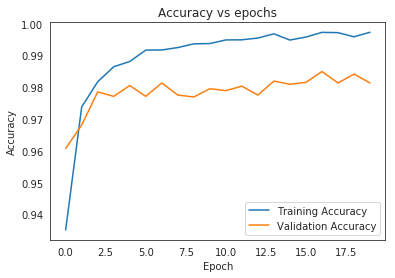

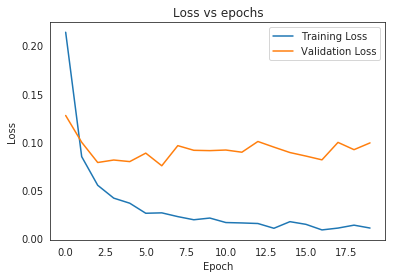

In [10]:
## Visualizamos curvas de entrenamiento

plt.figure()
plt.title("Accuracy vs epochs")
plt.plot(history_3hl.history['acc'])
plt.plot(history_3hl.history['val_acc'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")


plt.figure()
plt.title("Loss vs epochs")
plt.plot(history_3hl.history['loss'])
plt.plot(history_3hl.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")

Red Fully Connected - 5 Capas Ocultas

In [11]:
model_5hl = Sequential()
model_5hl.add(Dense(512, input_shape=(784,), activation="relu"))
model_5hl.add(Dense(1024, activation="relu"))
model_5hl.add(Dense(1024, activation="relu"))
model_5hl.add(Dense(1024, activation="relu"))
model_5hl.add(Dense(512, activation="relu"))
model_5hl.add(Dense(10, activation="softmax"))

model_5hl.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)

In [12]:
BATCH_SIZE = 128
NUM_EPOCHS = 20

history_5hl = model_5hl.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    validation_data=(X_val, y_val)
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 23s 422us/step - loss: 0.2399 - acc: 0.9255 - val_loss: 0.1156 - val_acc: 0.9664
Epoch 2/20
55000/55000 [==============================] - 23s 413us/step - loss: 0.1029 - acc: 0.9695 - val_loss: 0.1066 - val_acc: 0.9722
Epoch 3/20
55000/55000 [==============================] - 23s 413us/step - loss: 0.0707 - acc: 0.9794 - val_loss: 0.0889 - val_acc: 0.9750
Epoch 4/20
55000/55000 [==============================] - 23s 412us/step - loss: 0.0608 - acc: 0.9824 - val_loss: 0.0981 - val_acc: 0.9724
Epoch 5/20
55000/55000 [==============================] - 23s 414us/step - loss: 0.0473 - acc: 0.9862 - val_loss: 0.0797 - val_acc: 0.9808
Epoch 6/20
55000/55000 [==============================] - 23s 412us/step - loss: 0.0381 - acc: 0.9889 - val_loss: 0.0974 - val_acc: 0.9778
Epoch 7/20
55000/55000 [==============================] - 22s 405us/step - loss: 0.0366 - acc: 0.9895 - val_loss: 0.0

Text(0,0.5,'Loss')

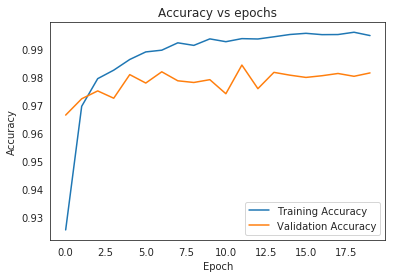

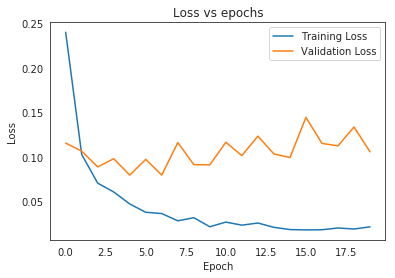

In [13]:
## Visualizamos curvas de entrenamiento

plt.figure()
plt.title("Accuracy vs epochs")
plt.plot(history_5hl.history['acc'])
plt.plot(history_5hl.history['val_acc'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")


plt.figure()
plt.title("Loss vs epochs")
plt.plot(history_5hl.history['loss'])
plt.plot(history_5hl.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")

**Conclusión**: Las dos redes overfittean, pero la que menos overfitting presenta es la red con 3 capas ocultas.

---

> Ejercicio 3

Use la comparación anterior para elegir un modelo.

Realice las predicciones en el conjunto de test y grafique 9 imágenes mal clasificada por el modelo elegido.

In [14]:
score_3hl = model_3hl.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss    : {score_3hl[0]}')
print(f'Test Accuracy: {score_3hl[1]}')

10000/10000 [==============================] - 1s 68us/step
Test Loss    : 0.09380558274728364
Test Accuracy: 0.9818


In [15]:
y_pred = model_3hl.predict_classes(X_test)

display(y_test)
display(y_pred)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([7, 2, 1, ..., 4, 5, 6])

In [16]:
enc = OneHotEncoder()
y_pred_onehot = enc.fit_transform(y_pred.reshape(-1, 1)).toarray()

display(y_pred_onehot)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

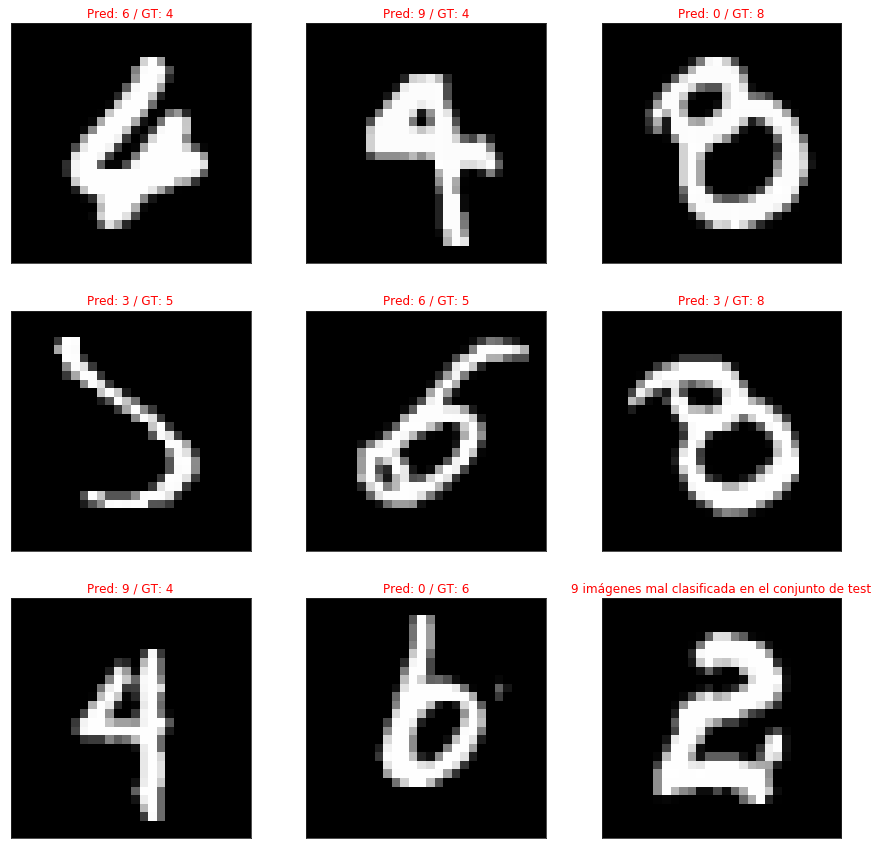

In [17]:
idxs_wrong_pred = np.array([i for i in range(len(y_test)) if (y_pred_onehot[i] != y_test[i]).any()])

# Visualizamos algunas imagenes
fig, ax = plt.subplots(3, 3, figsize=[15, 15])

for j in range(3):
    for i in range(3):
        for idx in np.random.choice(idxs_wrong_pred, 9):            
            image = X_test[idx]
            ground_truth = int(enc.inverse_transform(y_test[idx].reshape(1, -1))[0][0])
            pred = int(enc.inverse_transform(y_pred_onehot[idx].reshape(1, -1))[0][0])

            ax[i,j].imshow(image.reshape(28, 28), 'gray')
            ax[i,j].set_title(f'Pred: {pred} / GT: {ground_truth}', color='r')
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])

# fig.subplots_adjust(wspace=0.1, hspace=0)
# plt.title("9 imágenes mal clasificada en el conjunto de test")
plt.show()

---

> Ejercicio 4

Defina dos redes convolucionales diferentes que sean capaces de clasificar la base
MNIST.

Utilice para entrenar ambas la base de entrenamiento aumentada (por 21=3x3x3)
utilizando rotación, escala y traslación.

In [6]:
X_train = mnist.train.images
y_train = mnist.train.labels

X_val = mnist.validation.images
y_val = mnist.validation.labels

X_test = mnist.test.images
y_test = mnist.test.labels

In [7]:
X_train = X_train.reshape(55000, 28, 28, 1)
X_val = X_val.reshape(5000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [8]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print()
print(f"X_val shape  : {X_val.shape}")
print(f"y_val shape  : {y_val.shape}")
print()
print(f"X_test shape : {X_test.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape: (55000, 28, 28, 1)
y_train shape: (55000, 10)

X_val shape  : (5000, 28, 28, 1)
y_val shape  : (5000, 10)

X_test shape : (10000, 28, 28, 1)
y_test shape : (10000, 10)


In [9]:
##### Some Constants #####
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10

BATCH_SIZE = 128
NUM_EPOCHS = 20

In [10]:
### Data Augmentation ###

# Training data generator
datagen_train = ImageDataGenerator(
    rescale=1./255,  # We also can make a rescale on the data
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2
)

# Validation data generator
datagen_val = ImageDataGenerator(
    rescale=1./255,  # We also can make a rescale on the data
)

#########################

CNN sin dropout

In [11]:
inputs = Input(shape=(IMG_ROWS, IMG_COLS, 1))

conv1 = Conv2D(64, 5, activation="relu")(inputs)
maxPool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(128, 3, activation="relu")(maxPool1)
maxPool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

flatten = Flatten()(maxPool2)

dense1 = Dense(256, activation="sigmoid")(flatten)
dense2 = Dense(64, activation="sigmoid")(dense1)

outputs = Dense(NUM_CLASSES, activation="softmax")(dense2)

model_cnn1 = Model(
    inputs=inputs,
    outputs=outputs
)

model_cnn1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model_cnn1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               8194

In [ ]:
history_cnn0 = model_cnn1.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    validation_data=(X_val, y_val)
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 55000 samples, validate on 5000 samples
Epoch 1/20





55000/55000 [==============================] - 48s 870us/step - loss: 0.3540 - acc: 0.9201 - val_loss: 0.0850 - val_acc: 0.9802
Epoch 2/20
55000/55000 [==============================] - 47s 857us/step - loss: 0.0600 - acc: 0.9851 - val_loss: 0.0460 - val_acc: 0.9896
Epoch 3/20
55000/55000 [==============================] - 47s 852us/step - loss: 0.0378 - acc: 0.9900 - val_loss: 0.0375 - val_acc: 0.9900
Epoch 4/20
55000/55000 [==============================] - 47s 857us/step - loss: 0.0264 - acc: 0.9930 - val_loss: 0.0322 - val_acc: 0.9912
Epoch 5/20
 2432/55000 [>.............................] - ETA: 43s - loss: 0.0291 - acc: 0.9930

In [ ]:
history_cnn1 = model_cnn1.fit_generator(
    datagen_train.flow(X_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    validation_data=datagen_val.flow(X_val, y_val, batch_size=BATCH_SIZE),
    validation_steps=X_val.shape[0] // BATCH_SIZE
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





429/429 [==============================] - 52s 121ms/step - loss: 2.3080 - acc: 0.1041 - val_loss: 2.3083 - val_acc: 0.0978
Epoch 2/20
428/429 [============================>.] - ETA: 0s - loss: 2.3051 - acc: 0.1049

Text(0,0.5,'Loss')

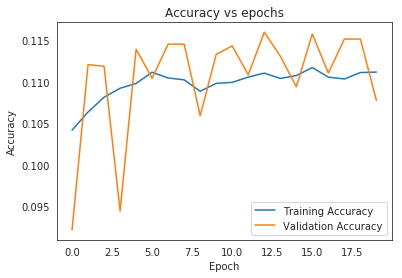

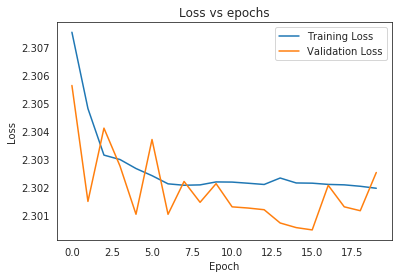

In [24]:
## Visualizamos curvas de entrenamiento

plt.figure()
plt.title("Accuracy vs epochs")
plt.plot(history_cnn1.history['acc'])
plt.plot(history_cnn1.history['val_acc'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")


plt.figure()
plt.title("Loss vs epochs")
plt.plot(history_cnn1.history['loss'])
plt.plot(history_cnn1.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")

CNN con dropout

In [25]:
inputs = Input(shape=(IMG_ROWS, IMG_COLS, 1))

conv1 = Conv2D(64, 5, activation=None)(inputs)
bn1 = BatchNormalization()(conv1)
activation1 = Activation("relu")(bn1)
maxPool1 = MaxPooling2D(pool_size=(2, 2))(activation1)

conv2 = Conv2D(128, 5, activation=None)(maxPool1)
bn2 = BatchNormalization()(conv2)
activation2 = Activation("relu")(bn2)
maxPool2 = MaxPooling2D(pool_size=(2, 2))(activation2)

flatten = Flatten()(maxPool2)

dense1 = Dense(256, activation="sigmoid")(flatten)
dense1 = Dropout(0.5)(dense1)

dense2 = Dense(64, activation="sigmoid")(dense1)
dense2 = Dropout(0.5)(dense2)

outputs = Dense(NUM_CLASSES, activation="softmax")(dense2)

model_cnn2 = Model(
    inputs=inputs,
    outputs=outputs
)

model_cnn2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [26]:
history_cnn2 = model_cnn2.fit_generator(
    datagen_train.flow(X_train, y_train, batch_size=BATCH_SIZE),
    epochs=NUM_EPOCHS,
    validation_data=datagen_val.flow(X_val, y_val, batch_size=BATCH_SIZE),
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
    validation_steps=X_val.shape[0] // BATCH_SIZE
)

Epoch 1/20
429/429 [==============================] - 123s 288ms/step - loss: 1.6745 - acc: 0.4119 - val_loss: 5.0873 - val_acc: 0.1126
Epoch 2/20
429/429 [==============================] - 122s 284ms/step - loss: 0.9508 - acc: 0.6915 - val_loss: 3.5649 - val_acc: 0.1131
Epoch 3/20
429/429 [==============================] - 122s 284ms/step - loss: 0.6847 - acc: 0.7839 - val_loss: 5.9815 - val_acc: 0.1078
Epoch 4/20
429/429 [==============================] - 122s 283ms/step - loss: 0.5770 - acc: 0.8239 - val_loss: 5.9423 - val_acc: 0.1076
Epoch 5/20
429/429 [==============================] - 122s 284ms/step - loss: 0.5050 - acc: 0.8494 - val_loss: 7.2821 - val_acc: 0.0987
Epoch 6/20
429/429 [==============================] - 123s 287ms/step - loss: 0.4613 - acc: 0.8628 - val_loss: 4.9050 - val_acc: 0.1067
Epoch 7/20
429/429 [==============================] - 122s 284ms/step - loss: 0.4257 - acc: 0.8738 - val_loss: 4.5886 - val_acc: 0.1149
Epoch 8/20
429/429 [============================

Text(0,0.5,'Loss')

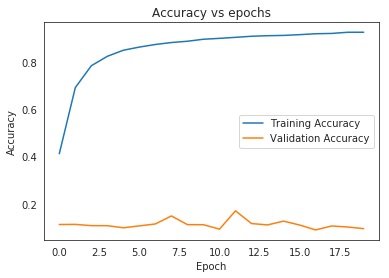

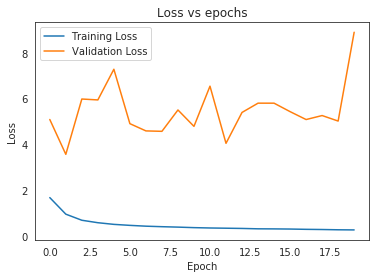

In [27]:
## Visualizamos curvas de entrenamiento

plt.figure()
plt.title("Accuracy vs epochs")
plt.plot(history_cnn2.history['acc'])
plt.plot(history_cnn2.history['val_acc'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")


plt.figure()
plt.title("Loss vs epochs")
plt.plot(history_cnn2.history['loss'])
plt.plot(history_cnn2.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")

---

> Ejercicio 5

Describa en detalle una posible aplicación de las redes convolucionales vistas en el
taller a un problema de clasificación en ciencia, el estado o en la industria.

**Atributador de Fashion**

Una posible aplicacion de las redes convolucionales en la industria es un atributador de ropa, en el cual la red sea capaz de aprender si una remera es manga corta o manga largo, si tiene el cuello redondo o en escote V. Ademñas del color de la ropa.

Este uso es muy util en los ecommerce cuando alguien quiere vender una ropa pero no detalla las caracteristicas de la misma, siendo la red muy util en este caso ayudando a los usuarios a buscar prendas por sus atributos.